In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [59]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [61]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385571,35.250696,26.767993,28.908790,855215656
2007-10-08,30.727674,33.480127,30.534519,33.480127,126671715
2007-10-09,32.820179,33.109910,29.085858,30.743766,116725709
2007-10-10,33.125996,33.802037,32.836265,33.673266,67931378
2007-10-11,36.828121,38.630897,32.836264,38.630897,106320954


In [63]:
df.shape

(4208, 5)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [67]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [69]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365265,62.829875,63.603316,2.061999e+07
min,18.908407,20.212435,16.952366,20.114632,0.000000e+00
25%,36.349702,36.923185,35.812874,36.386933,4.799653e+06
50%,55.232321,55.870065,54.493158,55.338360,8.344398e+06
75%,82.704777,83.691975,81.724076,82.727270,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [71]:
df = df.reset_index()

In [73]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [75]:
df.to_csv("powergrid.csv")


In [77]:
data01 = pd.read_csv("powergrid.csv")

In [79]:
data01.head()


,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557052612305,35.25069620600811,26.767993469907726,28.90878995513679,855215656
2,1,2007-10-08,30.72767448425293,33.480126947172145,30.534519082817503,33.480126947172145,126671715
3,2,2007-10-09,32.8201789855957,33.109909879074095,29.08585756305142,30.743766243977518,116725709
4,3,2007-10-10,33.12599563598633,33.80203707612887,32.836264837746604,33.67326613443213,67931378


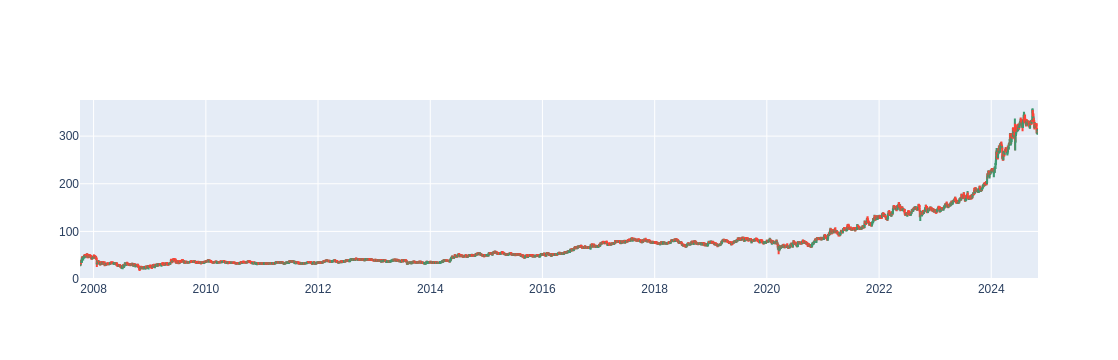

In [81]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [83]:
df = df.drop(['Date'], axis = 1)

/tmp/ipykernel_12014/1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [85]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385571,35.250696,26.767993,28.908790,855215656
1,30.727674,33.480127,30.534519,33.480127,126671715
2,32.820179,33.109910,29.085858,30.743766,116725709
3,33.125996,33.802037,32.836265,33.673266,67931378
4,36.828121,38.630897,32.836264,38.630897,106320954


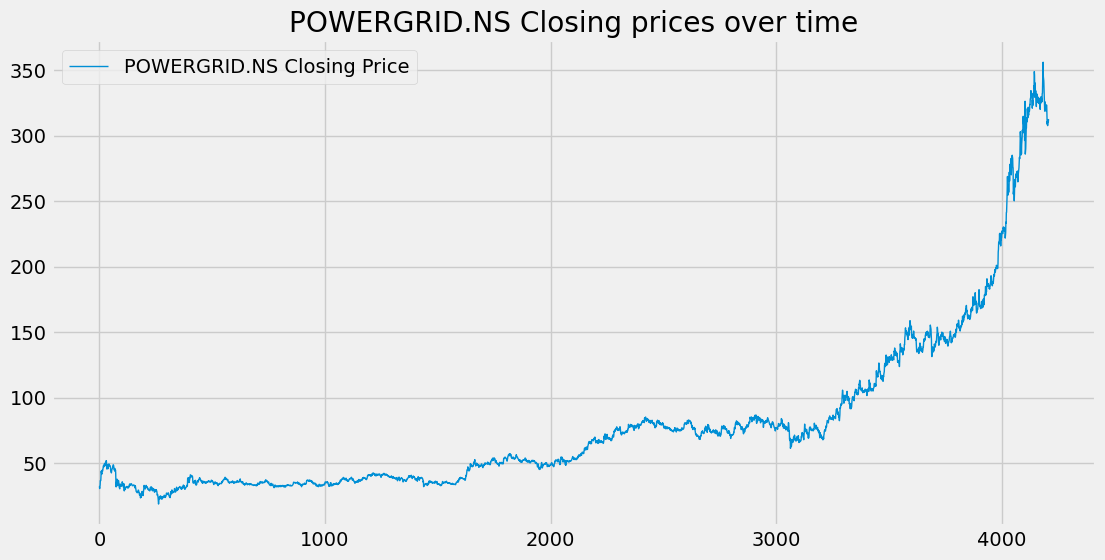

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

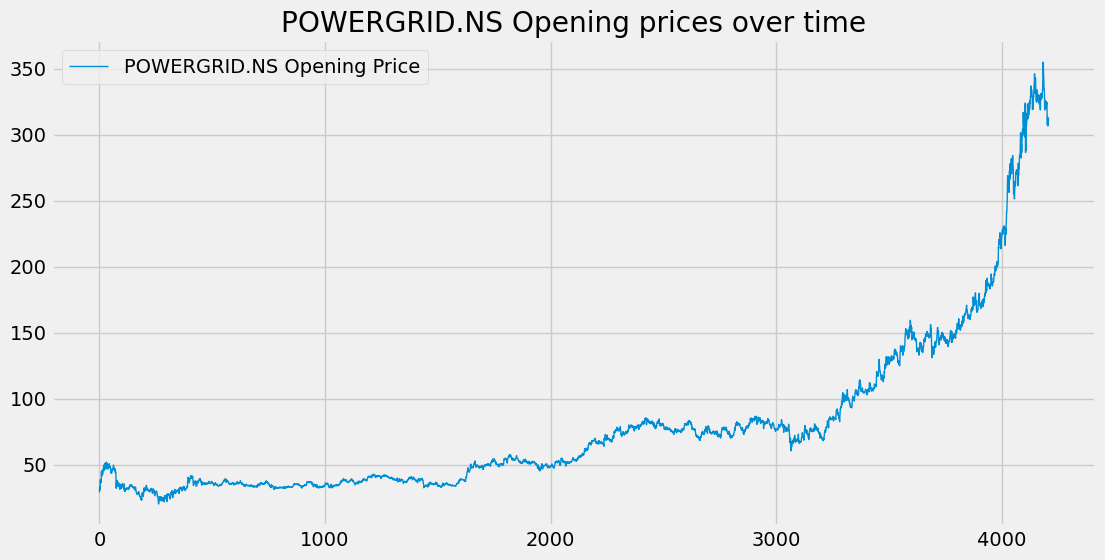

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

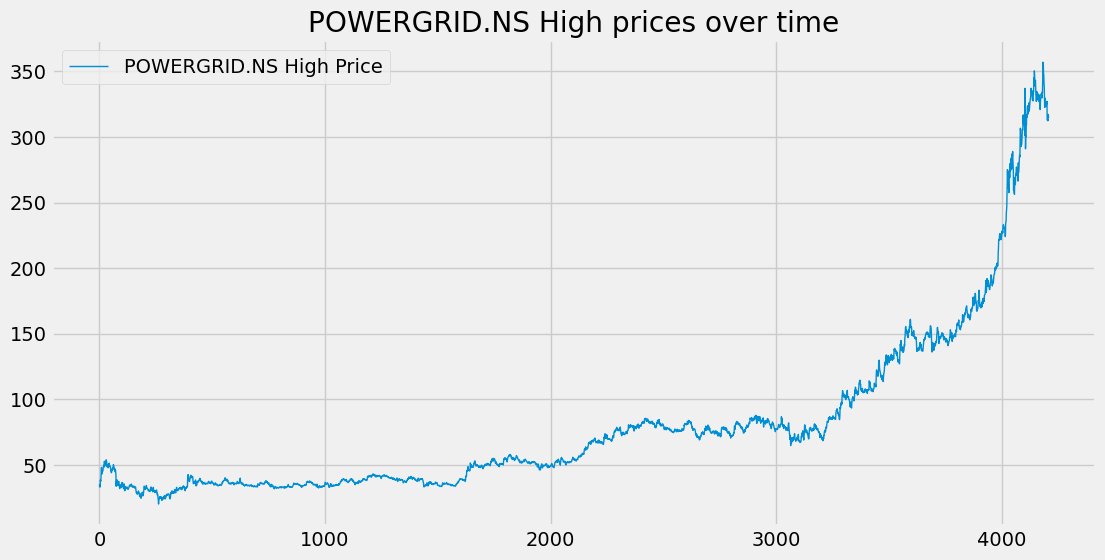

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

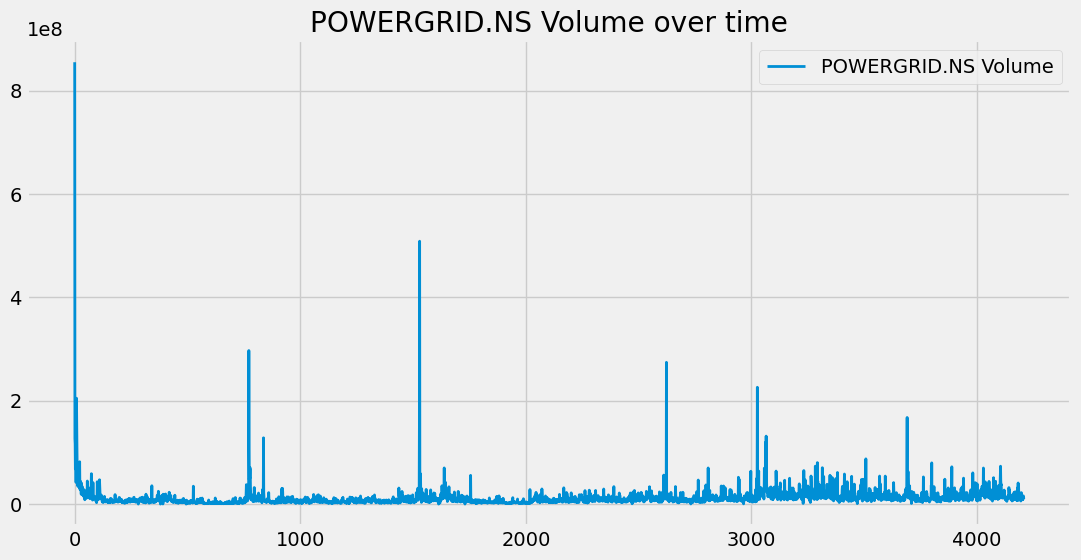

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [96]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [98]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [100]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [102]:
ma100 = df.Close.rolling(100).mean()

In [104]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [106]:
ma200 = df.Close.rolling(200).mean()

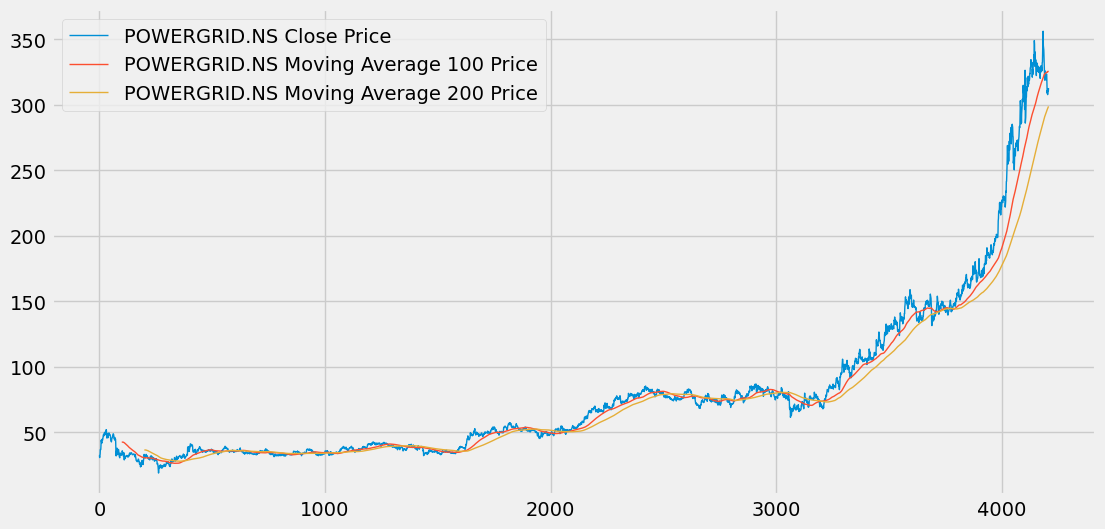

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [110]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [112]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

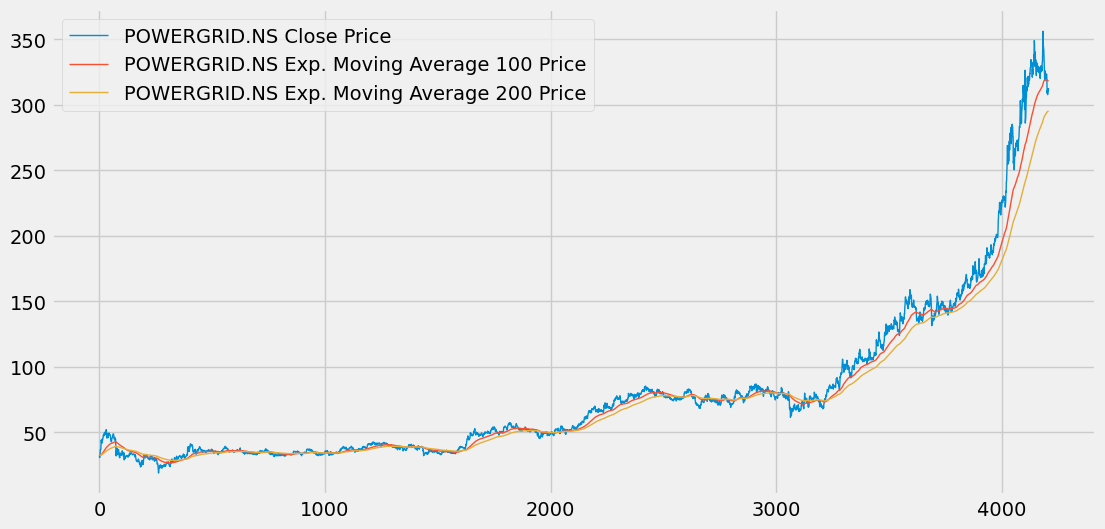

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [116]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [118]:
data_training.shape

(2945, 1)

In [120]:
data_testing.shape

(1263, 1)

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [124]:
data_training_array = scaler.fit_transform(data_training)

In [126]:
data_training_array


array([[0.19808594],
       [0.17371836],
       [0.20447377],
       ...,
       [0.90774422],
       [0.86000376],
       [0.8729964 ]])

In [128]:
data_training_array.shape[0]

2945

In [130]:


x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)



In [132]:
x_train.shape

(2845, 100, 1)

In [134]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2025-02-20 09:28:19.689895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 09:28:19.690432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 09:28:19.692524: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 09:28:19.698687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740018499.708580   12014 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740018499.71

In [136]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


2025-02-20 09:28:29.700787: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/levanhuy/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [138]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 0.0641
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0088
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0088
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0062
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0064
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0063
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.0053
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 0.0050
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 0.0050
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - loss: 0.0053
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.0045
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 0.0038
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0041
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0037
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [142]:
past_100_days = data_training.tail(100)

In [146]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [148]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731842
1,77.275726
2,77.539818
3,77.377289
4,77.824219


In [150]:
input_data = scaler.fit_transform(final_df)

In [152]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [154]:
x_test.shape

(1263, 100, 1)

In [156]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


In [158]:
y_predicted.shape

(1263, 1)

In [160]:
scaler.scale_

array([0.00339369])

In [162]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

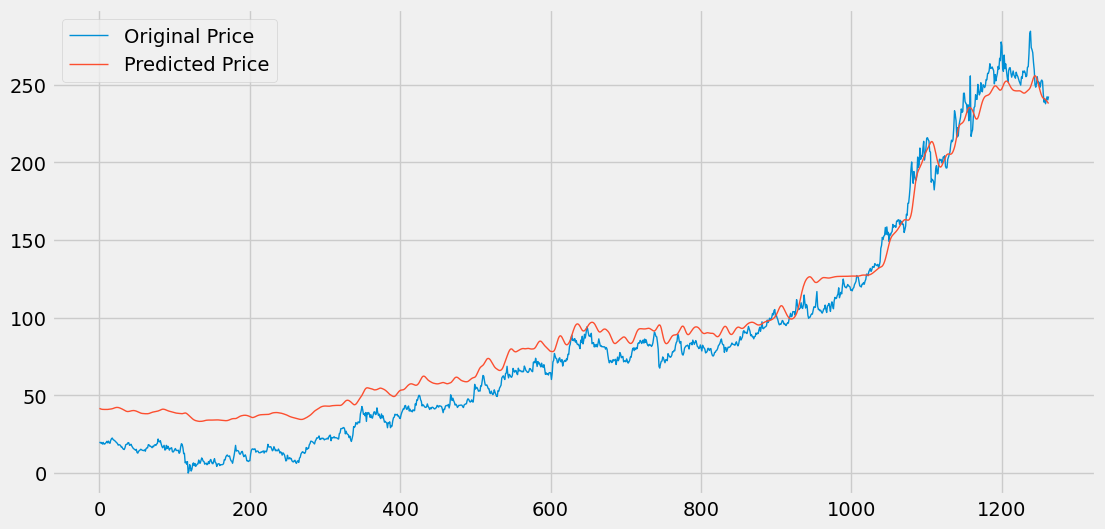

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()


In [168]:
model.save('my_model.keras')
